# Insurance Charges Predictions 

## Importing Relevant Libraries

In [1]:
#Relevant Analysis Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Relevant Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Relevant Preprocessing Libraries
##Varaince Inflation Factor to check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
##Standard Scaler
from sklearn.preprocessing import StandardScaler
##Train Test Split
from sklearn.model_selection import train_test_split

#Relevant Evaluation Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

#Setting Seaborn as Default Visualization Library
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## Loading Data

In [2]:
#Reading .csv file and saving as data_raw
data_raw = pd.read_csv('C:\\Users\\DELL\\Desktop\\Data_Akshay\\insurance.csv')

## 1. Data Exploration

In [3]:
#Exploring Head Rows in the Data Set
data_raw.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#Exploring Tail Rows in the Data Set
data_raw.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [5]:
#Exploring Columns in the Data Set
data_raw.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
#Exploring the Data Types in the Data Set
data_raw.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#Exploring the Discrete Statistics of the Data Set
data_raw.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


#### Conclusions:

Data Exploration Concludes that:
1. Target Variable: charges 
2. Numerical Features (Continuous): age, bmi
3. Numerical Features (Discrete): children
4. Categorical Features: sex, smoker, region

It also says that:
1. Data Set has no Missing Values; as there is a same number of count for all the variables in the above Discrete Statistics Table
2. Data Set has 50.52% of Male samples.
3. Data Set has 79.52% of Smoker samples.
4. All variables are looking important and has some dependency towards the target. Hence, no variables will be dropped.

## 2. Data Visualization

## 2.1. Visualizing Continuos Variables using Distribution Plot:

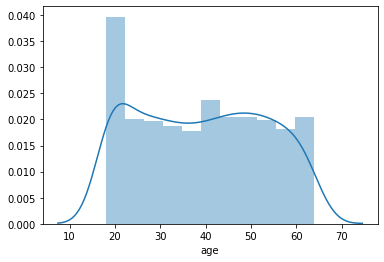

In [8]:
#Distribution Plot of Variable age
sns.distplot(data_raw['age'])

#### Observations:
1. Feature Age is normally distributed. Sample looks good.

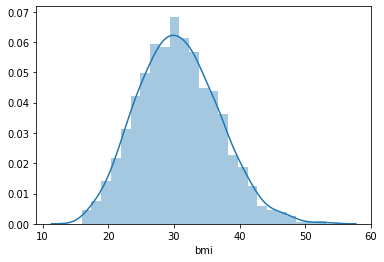

In [9]:
#Distribution Plot of Vairable bmi
sns.distplot(data_raw['bmi'])

#### Observations:
1. Feature BMI is normally distributed. Sample looks good.

## 2.2. Visualizing Discrete/Categorical Variables using Bar Plot:

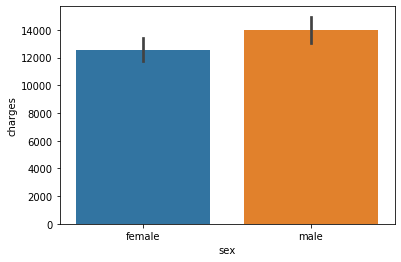

In [10]:
#Bar Plot of Variable Sex
sns.barplot(x='sex', y='charges', data=data_raw)

#### Observations:
1. As observed before, Male samples are more in the Data Set. Sample looks good.

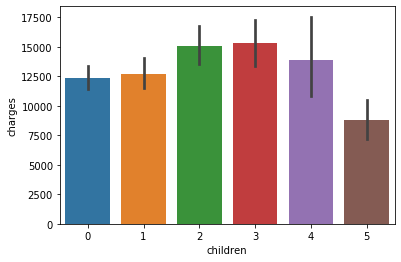

In [11]:
#Bar Plot of Variable Children
sns.barplot(x='children', y='charges', data=data_raw)

#### Observations:
1. A person with more children, ranging between 0 & 3, may expect more Insurance Charges.
2. It can be observed a person with more than 3 children can't expect much Insurance Charges. Actually it starts declining.

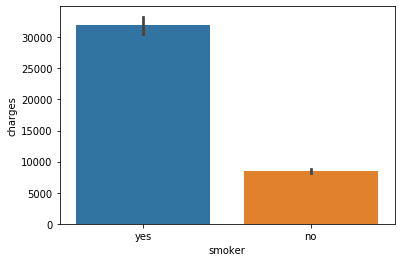

In [12]:
#Bar Plot of Variable Smoker
sns.barplot(x='smoker', y='charges', data=data_raw)

#### Observations:
1. It is clear a person who is a smoker can expect more Insurance Charges. The person who smokes has much higher probabilty of Heart & Lung Issues.
2. This feature may create a problem. As observed before using Discrete Statistics table the data set has more smoker samples, actually close to 80%. The sample looks biased. But, we'll keet it anyway as it is an important feature in prediction.

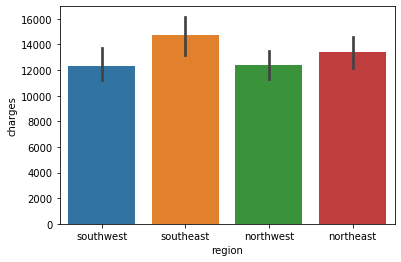

In [13]:
#Bar Plot of Variable Region
sns.barplot(x='region', y='charges', data=data_raw)

#### Observations:
1. By observing Southeast reagion sample may expect slightly higher insurance charges.

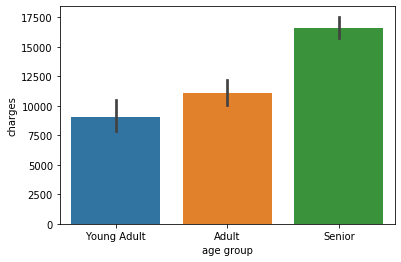

In [14]:
#Binning Ages into Logical Categries
bins = [17, 25, 40, 64]
labels = ['Young Adult', 'Adult', 'Senior']
data_raw['age group'] = pd.cut(data_raw['age'], bins, labels=labels)

#Bar Plot of the Variable Age Group
sns.barplot(x='age group', y='charges', data=data_raw)

#### Observations:
1. Age is one important feature in the given data set. It has higher impact than any of the feature given.
2. A person with bigger age may expect higher insurance charges.

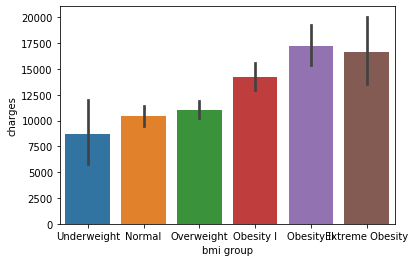

In [57]:
#Binning BMI into Logical Categories
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 55]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Extreme Obesity']
data_raw['bmi group'] = pd.cut(data_raw['bmi'], bins, labels=labels)

#Bar Plot of the Variable BMI Group
sns.barplot(x='bmi group', y='charges', data=data_raw)

#### Observations:
1. BMI is abother important feature, it has high impact on the prediction.
2. As per the observation, a person with bigger BMI may expect higher insurance charges.

In [16]:
#Let's see how's our data set now
data_raw.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges,age group,bmi group
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000,1338,1338
unique,NaN,2,NaN,NaN,2,4,NaN,3,6
top,NaN,male,NaN,NaN,no,southeast,NaN,Senior,Obesity I
freq,NaN,676,NaN,NaN,1064,364,NaN,637,397
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265,NaN,NaN
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,NaN,NaN
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150,NaN,NaN
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000,NaN,NaN
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515,NaN,NaN


#### Observations:
1. Feature Age and BMI are converted from Continuos into Categorical, they are stored under different columns under Age Group and BMI Group respectively.
2. Which makes more sense and has a quite impacting logic.
2. Columns Age and BMI has the same information, let's drop them.

## 3. Feature Engineering

## 3.1. Cleaning Data
#### Mapping categorical values into numerical values

In [17]:
sex_mapping = {'male':1, 'female':2}
data_raw['Sex'] = data_raw['sex'].map(sex_mapping)
data_raw

,age,sex,bmi,children,smoker,region,charges,age group,bmi group,Sex
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,2
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obesity I,1
2,28,male,33.000,3,no,southeast,4449.46200,Adult,Obesity I,1
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal,1
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Overweight,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior,Obesity I,1
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,Obesity I,2
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,Obesity II,2
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,Overweight,2


In [51]:
smoker_mapping = {'no':0, 'yes':1}
data_raw['Smoker'] = data_raw['smoker'].map(smoker_mapping)
data_raw

,age,sex,bmi,children,smoker,region,charges,age group,bmi group,Sex,Smoker,Region,Age Group,BMI Group
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,2,1,2,1,3
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obesity I,1,0,1,1,4
2,28,male,33.000,3,no,southeast,4449.46200,Adult,Obesity I,1,0,1,2,4
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal,1,0,3,2,2
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Overweight,1,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior,Obesity I,1,0,3,3,4
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,Obesity I,2,0,4,1,4
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,Obesity II,2,0,1,1,5
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,Overweight,2,0,2,1,3


In [52]:
region_mapping = {'southeast':1, 'southwest':2, 'northwest':3, 'northeast':4}
data_raw['Region'] = data_raw['region'].map(region_mapping)
data_raw

,age,sex,bmi,children,smoker,region,charges,age group,bmi group,Sex,Smoker,Region,Age Group,BMI Group
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,2,1,2,1,3
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obesity I,1,0,1,1,4
2,28,male,33.000,3,no,southeast,4449.46200,Adult,Obesity I,1,0,1,2,4
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal,1,0,3,2,2
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Overweight,1,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior,Obesity I,1,0,3,3,4
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,Obesity I,2,0,4,1,4
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,Obesity II,2,0,1,1,5
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,Overweight,2,0,2,1,3


In [53]:
age_mapping = {'Young Adult':1, 'Adult':2, 'Senior':3}
data_raw['Age Group'] = data_raw['age group'].map(age_mapping)
data_raw

,age,sex,bmi,children,smoker,region,charges,age group,bmi group,Sex,Smoker,Region,Age Group,BMI Group
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,2,1,2,1,3
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obesity I,1,0,1,1,4
2,28,male,33.000,3,no,southeast,4449.46200,Adult,Obesity I,1,0,1,2,4
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal,1,0,3,2,2
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Overweight,1,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior,Obesity I,1,0,3,3,4
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,Obesity I,2,0,4,1,4
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,Obesity II,2,0,1,1,5
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,Overweight,2,0,2,1,3


In [54]:
bmi_mapping = {'Underweight':1, 'Normal':2, 'Overweight':3, 'Obesity I':4, 'Obesity II':5, 'Extreme Obesity':6}
data_raw['BMI Group'] = data_raw['bmi group'].map(bmi_mapping)
data_raw

,age,sex,bmi,children,smoker,region,charges,age group,bmi group,Sex,Smoker,Region,Age Group,BMI Group
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,2,1,2,1,3
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obesity I,1,0,1,1,4
2,28,male,33.000,3,no,southeast,4449.46200,Adult,Obesity I,1,0,1,2,4
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal,1,0,3,2,2
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Overweight,1,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior,Obesity I,1,0,3,3,4
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,Obesity I,2,0,4,1,4
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,Obesity II,2,0,1,1,5
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,Overweight,2,0,2,1,3


#### Let's drop the unnecessary variables

In [55]:
data_cleaned = data_raw.drop(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'age group', 'bmi group'], axis=1)

In [56]:
data_cleaned

,charges,Sex,Smoker,Region,Age Group,BMI Group
0,16884.92400,2,1,2,1,3
1,1725.55230,1,0,1,1,4
2,4449.46200,1,0,1,2,4
3,21984.47061,1,0,3,2,2
4,3866.85520,1,0,3,2,3
...,...,...,...,...,...,...
1333,10600.54830,1,0,3,3,4
1334,2205.98080,2,0,4,1,4
1335,1629.83350,2,0,1,1,5
1336,2007.94500,2,0,2,1,3


#### Checking for Correlation of the variables

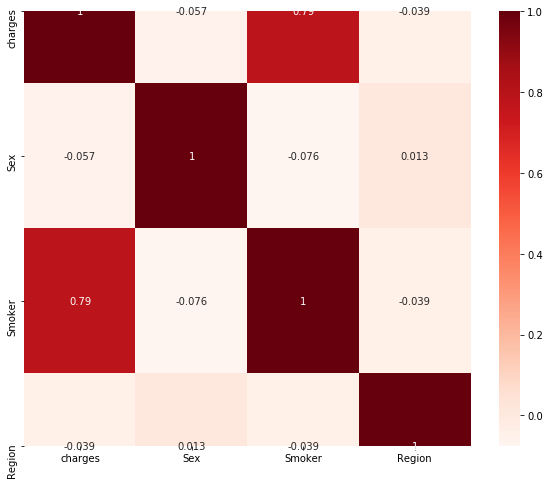

In [25]:
plt.figure(figsize=(10,8))
cor = data_cleaned.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [26]:
#Selecting relevant highly correlated features
cor_target = abs(cor['charges'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

charges    1.000000
Smoker     0.787251
Name: charges, dtype: float64

#### Observations:
1. Other than Smoker variable others have very negligible correlation with the Target(Charges)

## 3.2. Describing Target and Inputs Variables

In [28]:
#Describing Targets and Inputs
targets = data_cleaned['charges']
features = data_cleaned.drop(['charges', 'Sex', 'Region'], axis = 1)
features

,Smoker,Age Group,BMI Group
0,1,1,3
1,0,1,4
2,0,2,4
3,0,2,2
4,0,2,3
...,...,...,...
1333,0,3,4
1334,0,1,4
1335,0,1,5
1336,0,1,3


## 3.3. Scaling the features

In [29]:
scaler = StandardScaler()
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
features_scaled = scaler.transform(features)

## 3.4. Splitting Preprocessed Data into Train/Test Data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, targets, test_size = 0.2, random_state = 365)

## 4. Testing Models
1. Linear Regression
2. Random Forest Regressor
3. Support Vector Regressor
4. Decision Tree Regressor
5. Gaussian Process Regressor

## 4.1. Linear Regression

In [46]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
y_test = y_test.reset_index(drop = True)

#Validating Model
mae_reg = round(mean_absolute_error(y_test, y_pred), 2)
r2_reg = round(r2_score(y_test, y_pred), 2)

print(f"Model Performance: \nMean Absolute Error {mae_reg} \nR Square {r2_reg}")

Model Performance: 
Mean Absolute Error 4430.41 
R Square 0.71


## 4.2. Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

#Validating Model
mae_rfr = round(mean_absolute_error(y_test, y_pred), 2)
r2_rfr = round(r2_score(y_test, y_pred), 2)

print(f"Model Performance: \nMean Absolute Error {mae_rfr} \nR Square {r2_rfr}")

Model Performance: 
Mean Absolute Error 2884.19 
R Square 0.82


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 4.3. Support Vector Regressor

In [48]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

#Validating Model
mae_svr = round(mean_absolute_error(y_test, y_pred), 2)
r2_svr = round(r2_score(y_test, y_pred), 2)

print(f"Model Performance: \nMean Absolute Error {mae_svr} \nR Square {r2_svr}")

Model Performance: 
Mean Absolute Error 7860.96 
R Square -0.11


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 4.4. Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

#Validating Model
mae_dtr = round(mean_absolute_error(y_test, y_pred), 2)
r2_dtr = round(r2_score(y_test, y_pred), 2)

print(f"Model Performance: \nMean Absolute Error {mae_dtr} \nR Square {r2_dtr}")

Model Performance: 
Mean Absolute Error 2900.0 
R Square 0.82


## 4.5. Gaussian Process Regressor

In [58]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor()
gpr.fit(x_train, y_train)
y_pred = gpr.predict(x_test)

#Validating Model
mae_gpr = round(mean_absolute_error(y_test, y_pred), 2)
r2_gpr = round(r2_score(y_test, y_pred), 2)

print(f"Model Performance: \nMean Absolute Error {mae_gpr} \nR Square {r2_gpr}")

Model Performance: 
Mean Absolute Error 2899.03 
R Square 0.82


#### Validating Tested Models

In [59]:
models = pd.DataFrame({'Model':['Linear Regression', 'Random Forest Regressor', 'Support Vector Regressor', 'Decision Tree Regressor', 'Gaussian Process Regressor'], 'MAE':[mae_reg, mae_rfr, mae_svr, mae_dtr, mae_gpr], 'R Square':[r2_reg, r2_rfr, r2_svr, r2_dtr, r2_gpr]})

In [60]:
models.sort_values(by='R Square', ascending=False).set_index('Model')

,MAE,R Square
Model,,
Random Forest Regressor,2884.19,0.82
Decision Tree Regressor,2900.00,0.82
Gaussian Process Regressor,2899.03,0.82
Linear Regression,4430.41,0.71
Support Vector Regressor,7860.96,-0.11


#### Observations:
1. Random Forest Regressor is the most suitable model with greater R-Square value of 0.82 and least Mean Absolute Error of 2884.19

## 5. Testing Model

In [147]:
#Choosing Random Forest Regressor Predictions for further Testing
y_pred = rfr.predict(x_test)

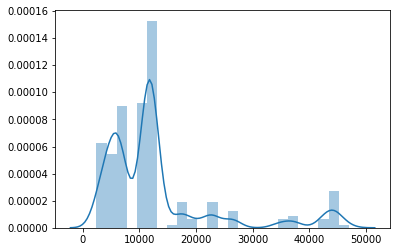

In [148]:
#Distributon Plot for the Predicted Values
sns.distplot(y_pred)

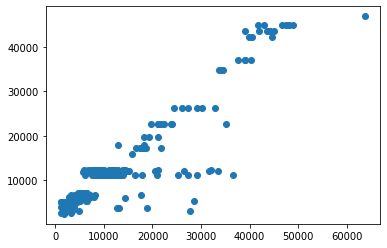

In [149]:
#Scatter Plot for the Predicted Values vs Actual Test Values
plt.scatter(y_test, y_pred)

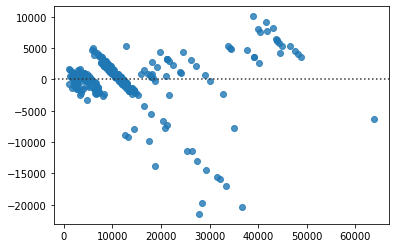

In [164]:
sns.residplot(y_test, y_pred)

In [156]:
#Let's check the Residuals for the values
model_performance = pd.DataFrame(y_test, columns=['Targets'])
model_performance['Predictions'] = y_pred
model_performance['Residuals'] = model_performance['Targets'] - model_performance['Predictions']
model_performance['Residuals Perc'] = np.absolute(model_performance['Residuals']/model_performance['Targets'] * 100)
model_performance['Absolute Error'] = abs(model_performance['Targets'] - model_performance['Predictions'])

In [157]:
pd.set_option('display.max_rows', 300)
model_performance.sort_values(by='Residuals Perc', ascending=False).reset_index(drop=True)

,Targets,Predictions,Residuals,Residuals Perc,Absolute Error
0,1137.01100,4994.154794,-3857.143794,339.235398,3857.143794
1,1261.44200,4994.154794,-3732.712794,295.908396,3732.712794
2,1242.26000,4048.325283,-2806.065283,225.883896,2806.065283
3,1639.56310,4994.154794,-3354.591694,204.602781,3354.591694
4,1674.63230,4994.154794,-3319.522494,198.223962,3319.522494
5,1515.34490,4048.325283,-2532.980383,167.155371,2532.980383
6,1880.07000,4994.154794,-3114.084794,165.636641,3114.084794
7,1981.58190,4994.154794,-3012.572894,152.028684,3012.572894
8,1607.51010,4048.325283,-2440.815183,151.838249,2440.815183
9,1149.39590,2643.201635,-1493.805735,129.964422,1493.805735
